In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(42)

(ds_train, ds_test), ds_info = tfds.load(
    "svhn_cropped",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.NSZEKR_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.NSZEKR_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.NSZEKR_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


Number of classes: 10


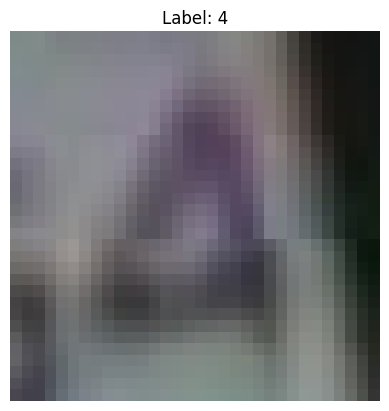

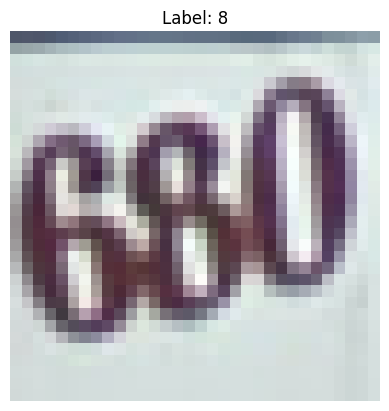

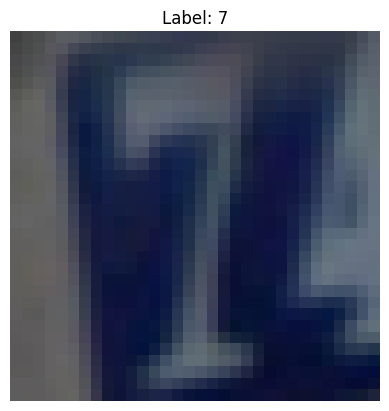

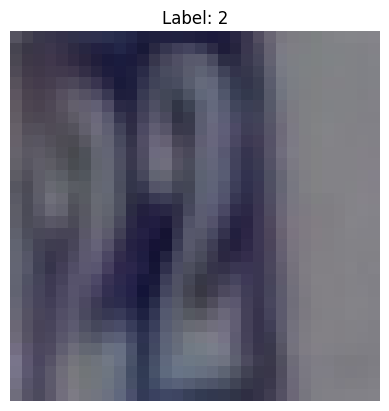

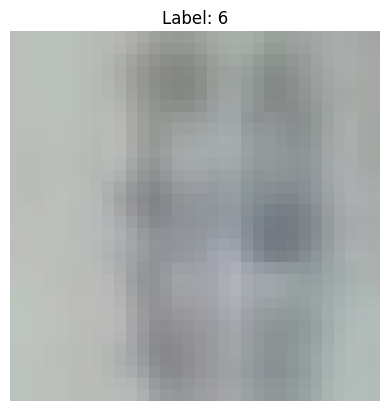

In [3]:
num_classes = ds_info.features["label"].num_classes
print("Number of classes:", num_classes)

for image, label in ds_train.take(5):
    plt.imshow(image)
    plt.title(f"Label: {label.numpy()}")
    plt.axis("off")
    plt.show()

In [4]:
def normalize_img(image, label):
    """Normalize images to range [0,1]."""
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

batch_size = 64

train_ds = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation="softmax")  # Multi-class classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
epochs = 15
history = model.fit(train_ds, validation_data=test_ds, epochs=epochs)

Epoch 1/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 124s 106ms/step - accuracy: 0.4634 - loss: 1.5610 - val_accuracy: 0.8342 - val_loss: 0.5660
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 107s 93ms/step - accuracy: 0.8250 - loss: 0.5908 - val_accuracy: 0.8735 - val_loss: 0.4399
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 140s 91ms/step - accuracy: 0.8599 - loss: 0.4762 - val_accuracy: 0.8868 - val_loss: 0.3961
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.8791 - loss: 0.4195 - val_accuracy: 0.8985 - val_loss: 0.3604
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.8926 - loss: 0.3704 - val_accuracy: 0.9024 - val_loss: 0.3452
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.8990 - loss: 0.3438 - val_accuracy: 0.9084 - val_loss: 0.3332
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 104s 91ms/step - accuracy: 0.9051 - loss: 0.3223 - val_accuracy: 0.9105 - val_loss: 0.3258
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 104s 91ms/step - accuracy:

In [8]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.4f}")

407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9142 - loss: 0.3363

Test Accuracy: 0.9123


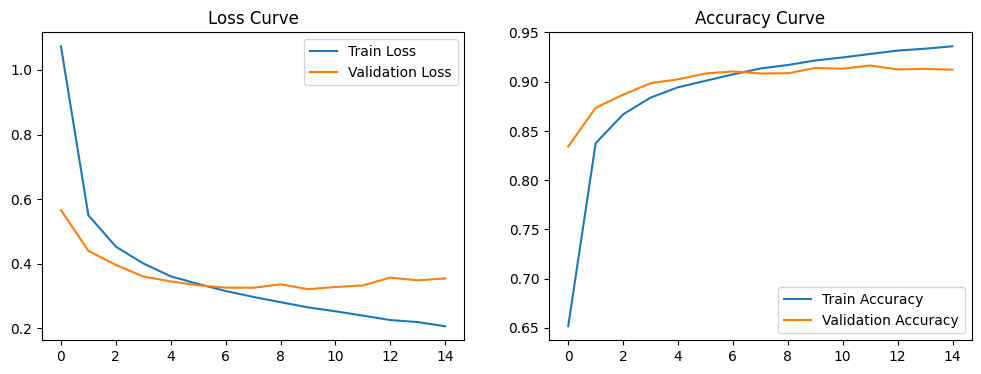

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()

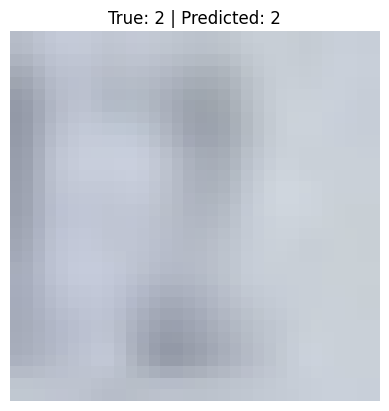

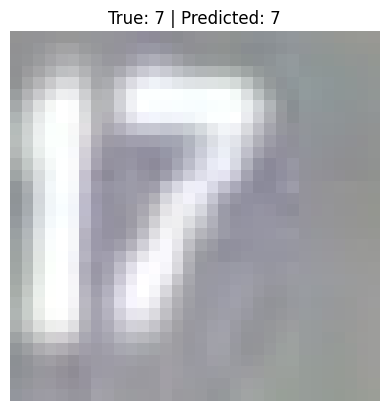

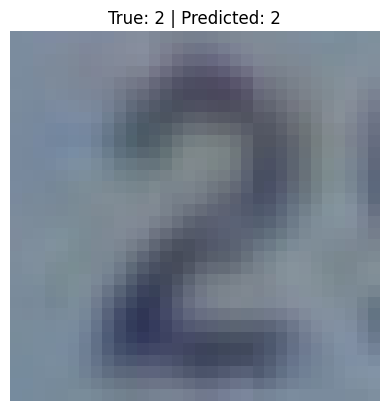

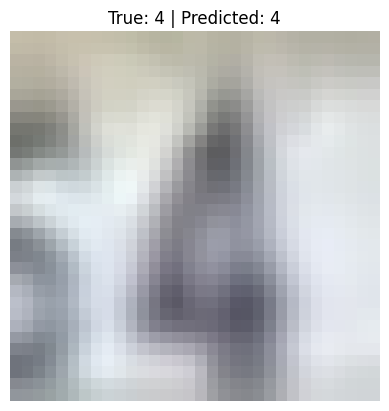

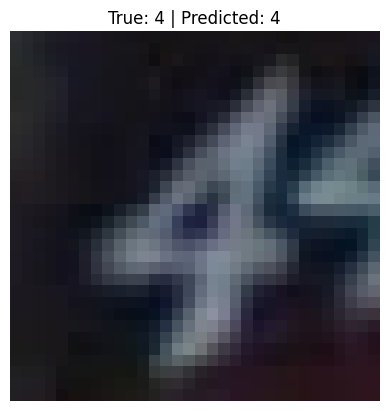

In [10]:
for image, label in ds_test.take(5):
    img = tf.expand_dims(image, axis=0)  # add batch dimension
    prediction = model.predict(img, verbose=0)
    predicted_label = prediction.argmax()

    plt.imshow(image)
    plt.title(f"True: {label.numpy()} | Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()